#                                                   Proyecto 7 - Análisis de patrones de consumo de Agua


## 1. Descripción del Proyecto

El proyecto elegido por el grupo 7 trata de una rama del área de Medio Ambiente y consiste en modelar el consumo de agua en la Ciudad de Sonora, una ciudad ubicada en el noroeste de México a lo largo de varios años.

La problemática real que se aborda es la mala gestión que puede ocurrir con el agua en los entornos Urbanos.

La creciente demanda de agua y a la vez la posible escasez de este recurso tan importante en la vida debido a varios factores como el cambio climático y la sobrepoblación que existe, estos factores hace que sea de prioridad para autoridades y empresas poder predecir y entender el manejo en el consumo de agua, para que se alargue el recurso y no existe guerras o criris por la lucha del agua.

Este proyecto busca desarrollar un modelo que permita pronosticar y tomar conciencia  sobre la demanda del agua, para que en el futuro tenga la planificación perfecta para la toma de decisiones sobre la gestión de este recurso tan vital para la existencia del planeta.


## 2. Objetivo o Meta del Proyecto

Los objetivos son:
- Evaluar posibles escenarios de escasez mediante simulaciones en el consumo de agua de la ciudad de Sonora.
- Predecir la demanda futura e identificar patrones de uso.

Al terminar este proyecto se busca tener un modelo capaz de pronosticar el consumo total de los próximos meses, lo que permitirá la planificación de esta ciudad pero que sirva como modelo para que otras ciudades con el mismo problema lo tomen y lo modelen a base su necesidad.


## 3. Descripción del Dataset

Para el proyecto, se utilizaron los siguientes datasets:


`AguaH.csv`: Este es el dataset original que contiene los datos de consumo de agua. 


`datos_imputados_KNN.csv`: Una versión procesada del dataset original, donde se han imputado los valores faltantes utilizando el algoritmo K-Nearest Neighbors (KNN). 

`consumo_total.csv`: Este archivo contiene los datos del consumo total de agua, generados a partir de los datos imputados para facilitar el análisis de series de tiempo. 

| Variable                | Tipo de Variable         | Descripción y Utilidad                                                                                                                                      |
|-------------------------|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `USO2013`                 | Categórica               | Describe el tipo de uso del suelo, como "H3" (vivienda de alta densidad) o "MX" (uso mixto). Es útil para segmentar el análisis y entender el consumo según la zona. |
| `TU`                      | Categórica               | Representa la tipología del usuario, como "DOMESTICO MEDIO", "DOMESTICO RESIDENCIAL", "COMERCIAL" o "SOCIAL". Esta variable es crucial para analizar las diferencias en el consumo de agua entre distintas categorías de clientes. |
| `DC`                      | Categórica               | Identifica el diámetro de la tubería de conexión a la red pública en pulgadas. Se utiliza para agrupar el consumo según la capacidad de la conexión.         |
| `M`                      | Categórica               | Identifica el fabricante o modelo del medidor de agua, como "MSDELAUNET" o "CICASA MMD-15 S". Permite investigar si el tipo de medidor influye en las mediciones de consumo. |
| `UL`                     | Categórica / Numérica    | Un identificador único que podría corresponder a un usuario o una ubicación específica, utilizado para agrupar los consumos por cliente.                     |
| `f.1_ENE_09 a f.1_DIC_15` | Numérica (Series de tiempo) | Estas variables registran el consumo de agua mensual para cada usuario, cubriendo el período de enero de 2009 a diciembre de 2015. Son las variables principales para el análisis de series de tiempo y la identificación de patrones de consumo. |


## 4. Variables del Dataset que se usarón

Para el análisis numérico, las columnas que se considero clave para la resolución del proyecto corresponden al consumo de agua mensual de:**`f.1_ENE_09`** a **`f.1_DIC_15`**.

Se eligio estas variables porque es clave para la investigación del problema ya que estas variables proporcionan datos históricos esenciales para el análisis, esto sirve para la construcción de modelos de series de tiempo , la identificación de tendencias estacionales y la evaluación de eventos externos, como una sequía.

Esta no es la única, además se utilizarón variables categóricas como **`TU`** (Tipo de Usuario) y **`USO2013`** (Tipo de Uso del Suelo), estas variables permite que el proyecto no se limite al consumo total, sino también que estudie el diferente patrón que existe entre el consumo residencial versus el empresarial o comercial.

## 5. Resolución

### 5.1. Preparación

#### Librerias importadas

Para la resolución de este proyecto, se ha empleado un conjunto de librerías de Python ampliamente utilizadas para este tipo de proyectos.

* **`numpy as np`**: Se utilizó para realizar todo lo que es operaciones matemáticas. 

* **`pandas as pd`**: Esta librería se utilizo para la base del análisis y manipulación de datos (Con esto se cargo el archivo CSV).

* **`sklearn.neighbors.NearestNeighbors`**: Se seleccionó específicamente para la **imputación de datos**. El algoritmo de K-Vecinos más Cercanos (KNN) es un método eficaz para completar los valores faltantes en un dataset ya que su uso para predecir es basandose en la similitud con otros puntos que hay en los datos.

* **`sklearn.preprocessing.MinMaxScaler`**: Su función es para normalizar los datos, escalando en un rango especifico(entre 0 y 1),  asegurando que todas las variables contribuyan de manera equitativa al modelo.

* **`matplotlib.pyplot as plt`** y **`seaborn as sns`**: Estas librerías se emplearon para la visualización de datos. `matplotlib` proporcionó el control granular para la creación de gráficos, mientras que `seaborn`, construido sobre `matplotlib`, simplificó la generación de visualizaciones estadísticas más atractivas y complejas. La combinación de ambas fue fundamental para:
    * **Identificar patrones de consumo**: A través de gráficos de series de tiempo.
    * **Evaluar la distribución de los datos**: Mediante histogramas o boxplots.
    * **Comunicar los resultados**: Presentando los hallazgos de una forma clara y visualmente atractiva en el informe.

* **`sns.set_style('whitegrid')`**: Se incluyó para mejorar la estética de todas las visualizaciones generadas. El estilo `'whitegrid'` añade un fondo blanco con líneas de cuadrícula grises que mejoran la legibilidad de los gráficos.

In [51]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

### Funciones utilizadas

Funciones utilizadas en la preparación de datos.

In [52]:
def normalizar(archivo_csv):
    """
    Normaliza los datos de un archivo CSV usando el escalador MinMaxScaler.

    Esta función lee un archivo CSV en un DataFrame de pandas, aplica el escalador
    MinMaxScaler a todas sus columnas numéricas y devuelve el DataFrame con
    los valores normalizados, donde todas las características se encuentran
    en un rango de 0 a 1.

    Args:
        archivo_csv (str): La ruta al archivo CSV que se desea normalizar.

    Returns:
        pd.DataFrame: Un DataFrame de pandas con los datos normalizados.
    """
    df_temp= pd.read_csv(archivo_csv)
    scaler = MinMaxScaler()
    df_normalizado = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns)
    return df_normalizado

In [53]:
def FirstNonNull(row):
    """
    Encuentra el índice de la primera aparición de un valor no nulo en una fila.

    La función recorre una fila (típicamente una Serie booleana resultante de df.isnull())
    y devuelve el índice de la primera columna que no contiene un valor nulo.
    Esto es útil para identificar el inicio de una serie de datos válidos.

    Args:
        row (pd.Series): Una serie de pandas que contiene valores booleanos,
                         donde `False` indica un valor no nulo.

    Returns:
        int: El índice de la primera columna con un valor no nulo.
    """
    count=0
    for col in row:
        if col==False: return count
        else: count = count+1
    return count

def LastNonNull(row):
    """
    Encuentra el índice de la última aparición de un valor no nulo en una fila.

    La función itera sobre una fila y registra el índice de cada valor no nulo
    que encuentra. Al finalizar el recorrido, el valor almacenado es el
    índice de la última columna con un valor no nulo. Esto es útil para
    identificar el final de una serie de datos válidos.

    Args:
        row (pd.Series): Una serie de pandas que contiene valores booleanos,
                         donde `False` indica un valor no nulo.

    Returns:
        int: El índice de la última columna con un valor no nulo, o -1 si todos son nulos.
    """
    count=0
    flag=-1
    for col in row:
        if col==False:
            flag=count
            count=count+1
        else: count=count+1
    return flag
def Setzero(x):
    """
    Convierte un valor negativo a cero.

    Esta función evalúa un valor numérico y, si este es menor que cero,
    retorna 0. De lo contrario, devuelve el valor original. Es útil para
    asegurar que los valores en una columna no sean negativos.

    Args:
        x (float or int): El valor numérico a evaluar.

    Returns:
        float or int: El valor original o 0, si el original era negativo.
    """
    if x<0: return 0
    else: return x

#### Funciones utilizadas para la imputación

In [54]:
def KnnImputeSimple(sample, x, k):
    """
    Realiza una imputación simple de un valor faltante en una fila utilizando KNN.

    Esta función toma una fila con un valor nulo y busca sus k-vecinos más cercanos
    dentro de una muestra de datos. La similitud se basa en un subconjunto de
    columnas adyacentes al valor faltante. El valor imputado se calcula como
    el promedio de los valores correspondientes de los k-vecinos.

    Args:
        muestra (pd.DataFrame): El DataFrame de datos que sirve como base para
                                encontrar los vecinos más cercanos.
        fila_a_imputar (pd.Series): La fila de datos que contiene el valor nulo
                                    que se desea imputar.
        k (int): El número de vecinos más cercanos a considerar para la imputación.

    Returns:
        list: Una lista con los valores imputados.
    """

    ## Mask the columns with NaN value (not to compare)
    x_mask = x.notnull().tolist()
    x_mask_toggled = x.isnull().tolist()
    sample_masked = sample.iloc[:, x_mask]
    x_masked = x[x_mask]

    ## Extent to which column comparison is carried out. Here 6 columns (months) before and after the the column in question
    comp_size = 6
    i = x_mask_toggled.index(True)
    ## Handle when there are less than 4 columns to look at before or after the column in question
    i = max(comp_size, min(i, 84-1-comp_size))
    x_masked = x_masked[i-comp_size:i+comp_size].values
    sample_masked = sample_masked.iloc[:, i-comp_size:i+comp_size]

    ## I use kd_tree algorithm here.
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='kd_tree', n_jobs=-1)
    nbrs.fit(sample_masked)
    n_ones = nbrs.kneighbors([x_masked])

    ## Find k nearest ones and average the predicted values to return
    value = []
    for n in range(x.isnull().sum()):
        temp = []
        for j in range(k):
            temp.append(sample.iloc[n_ones[1][0][j]][x_mask_toggled][n])
        value.append(np.sum(temp)/k)

    return value

def KnnImputeInPlace(sample, itrp, k):
    """
    Imputa múltiples valores faltantes en una fila de manera iterativa utilizando KNN.

    Esta función utiliza los índices del primer y último valor no nulo para
    delimitar la porción de la fila a imputar. Luego, itera sobre cada valor
    nulo dentro de esa porción y llama a la función `imputar_con_knn_simple`
    para rellenarlo.

    Args:
        muestra (pd.DataFrame): El DataFrame de datos que sirve como base para
                                encontrar los vecinos más cercanos.
        fila_a_imputar (pd.Series): La fila de datos que contiene los valores
                                    nulos que se desean imputar.
        k (int): El número de vecinos más cercanos a considerar para la imputación.

    Returns:
        pd.Series: La fila de entrada con los valores nulos imputados.
    """
    fn = itrp['FirstNonNull']
    ln = itrp['LastNonNull']
    serv = itrp[int(fn):int(ln)+1]

    index = serv[serv.isnull()].index.tolist()
    itrp_imputed = itrp
    for i in range(len(index)):
        idx = index.copy()
        idx.pop(i)
        imp = KnnImputeSimple(sample.iloc[:, int(fn):int(ln)+1].drop(sample[idx], axis=1), serv.drop(idx), k)
        itrp_imputed.iloc[i] = imp[0]

    return itrp_imputed

#### Funciones para calcular estadisticas, diferenciar una serie de tiempo y graficar los resultados:

In [55]:
def diferenciar(serie):
    """
    Realiza una diferenciación estacional de 12 períodos en una serie de tiempo.

    Esta función toma una serie de tiempo de pandas con una columna 'Consumo'
    y aplica la operación de diferenciación con un período de 12, lo cual es útil
    para eliminar la estacionalidad anual. El resultado es una nueva serie donde
    cada valor es la diferencia con respecto al valor del mismo mes del año
    anterior. Finalmente, elimina las filas con valores nulos generados por la
    operación de diferenciación.

    Args:
        serie (pd.DataFrame): Un DataFrame de pandas con un índice de tiempo y una
                              columna llamada 'Consumo'.

    Returns:
        pd.DataFrame: Un nuevo DataFrame con la serie diferenciada y sin valores nulos.
    """
    df_diferenciado = serie.copy()
    df_diferenciado['Consumo'] = serie['Consumo'].diff(periods=12)
    df_diferenciado = df_diferenciado.dropna()
    return df_diferenciado



In [56]:
def graficar(serie):
    """
    Grafica una serie de tiempo para su visualización.

    Esta función crea un gráfico de línea a partir de una serie de pandas,
    permitiendo una inspección visual de las tendencias, la estacionalidad
    y los posibles valores atípicos en los datos. El gráfico se muestra
    inmediatamente.

    Args:
        serie (pd.DataFrame or pd.Series): La serie de tiempo que se desea graficar.
    """
    df_temp = serie.copy()
    df_temp.plot()

In [57]:
def calcular_estadisticas(serie):
    """
    Calcula y visualiza la media y la desviación estándar anual de una serie de tiempo.

    La función extrae el año del índice de la serie de tiempo, agrupa los datos por
    año y calcula la media y la desviación estándar del consumo. Estas estadísticas
    proporcionan información sobre la tendencia central y la volatilidad anual.
    El resultado se presenta tanto en una tabla como en un gráfico de líneas.

    Args:
        serie (pd.DataFrame): Un DataFrame de pandas con un índice de fecha
                              y una columna llamada 'Consumo'.
    """
    df_estadisticas = serie.copy()
    df_estadisticas['Año'] = df_estadisticas.index.year
    estadisticas = df_estadisticas.groupby('Año')['Consumo'].agg([
    'mean',       # media
    'std',        # desviación estándar
    ])
    display(estadisticas)
    estadisticas[['mean', 'std']].plot(title='Media y desviación estándar por año')
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show() 

#### Funciones para calcular reazagos utilizados para la ACF (función de autocorrelación):


In [58]:
def numerador_rk(serie, promedio,k):
    """
    Calcula el numerador de la fórmula para el coeficiente de autocorrelación (rk).

    La función itera sobre la serie de tiempo para calcular la suma de los productos
    de las desviaciones con respecto a la media, con un rezago `k`. Esta parte de
    la fórmula mide la covarianza de la serie consigo misma en el rezago especificado.

    Args:
        serie (np.array): Un array de numpy que contiene los valores de la serie de tiempo.
        promedio (float): El valor promedio de la serie de tiempo.
        k (int): El rezago (lag) para el cual se está calculando la autocorrelación.

    Returns:
        float: El valor del numerador del coeficiente de autocorrelación.
    """
    T = len(serie)
    suma = 0
    
    for t in range(k+1, T):
        suma += (serie[t] - promedio) * (serie[t - k] - promedio)
    return suma

In [59]:
def denominador_rk(serie, promedio):
    T = len(serie)
    suma = 0

    for t in range(1, T):
        suma += (serie[t] - promedio)**2
    return suma

In [60]:
def coeficientes_rk(serie, n_rezagos):
    """
    Calcula y grafica los coeficientes de autocorrelación (rk) para una serie de tiempo.

    Esta función coordina el cálculo de los coeficientes de autocorrelación
    muestrales. Primero, calcula el promedio y el denominador de la serie. Luego,
    en un bucle, calcula el numerador para cada rezago (desde 0 hasta n_rezagos-1)
    y obtiene el coeficiente rk. Finalmente, llama a la función de graficación
    para visualizar el correlograma.

    Args:
        serie (pd.DataFrame): Un DataFrame de pandas con un índice de tiempo
                              y una columna llamada "Consumo".
        n_rezagos (int): El número de rezagos para los que se calcularán los
                         coeficientes de autocorrelación.

    Returns:
        np.array: Un array de numpy con los coeficientes de autocorrelación calculados.
    """
    promedio = serie["Consumo"].sum() / len(serie)
    
    denominador = denominador_rk(serie["Consumo"].values, promedio)

    r = np.empty(n_rezagos, dtype=float)
    for k in range (0 , n_rezagos):
        numerador = numerador_rk(serie["Consumo"].values, promedio, k)
        r[k] = numerador/denominador

    graficar_coeficientes_rk(serie, r)
    return r

def graficar_coeficientes_rk(serie, rk):
    """
    Grafica el correlograma muestral (ACF) con bandas de confianza.

    Esta función visualiza los coeficientes de autocorrelación calculados
    para cada rezago. Además, dibuja bandas de confianza para ayudar a
    determinar qué rezagos son estadísticamente significativos. La banda de
    confianza se calcula como 1.96 / sqrt(n), donde n es el número de
    observaciones en la serie.

    Args:
        serie (pd.DataFrame): El DataFrame original de la serie de tiempo, utilizado
                              para obtener el número de observaciones (n).
        rk (np.array): Un array de numpy con los coeficientes de autocorrelación
                       calculados para cada rezago.
    """
    n = len(serie)
    confianza = 1.96/ (n**(1/2))
    k_vals = np.arange(len(rk)) 

    plt.figure(figsize=(10, 5))
    plt.stem(k_vals, rk, basefmt=" ")
    plt.axhline(0, color='black', linewidth=1)
    plt.axhline(y=confianza, color='red', linestyle='--', label=f'+{confianza:.3f}')
    plt.axhline(y=-confianza, color='red', linestyle='--', label=f'-{confianza:.3f}')
    plt.title("Correlograma Muestral (ACF)")
    plt.xlabel("Rezago (k)")
    plt.ylabel("rk")
    plt.xticks(k_vals)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Funciones para la parte de PACF

In [61]:

def plot_pacf(pacf_vals, n_obs, conf_level=0.95):
    """
    Grafica la función de autocorrelación parcial (PACF) calculada manualmente.

    Esta función toma los valores de la PACF para diferentes rezagos y los visualiza
    en un correlograma de tallo. Adicionalmente, calcula y grafica las bandas de
    confianza para un nivel de confianza especificado, lo que permite identificar
    qué coeficientes de PACF son estadísticamente significativos.

    Args:
        pacf_vals (array-like): Los valores de la PACF para los rezagos,
                                sin incluir el rezago 0.
        n_obs (int): El número de observaciones en la serie de tiempo original,
                     necesario para calcular el intervalo de confianza.
        conf_level (float, optional): El nivel de confianza para las bandas de
                                      significancia. Por defecto es 0.95.
    """
    lags = np.arange(1, len(pacf_vals)+1)
    z = 1.96 if conf_level == 0.95 else {
        0.90: 1.645,
        0.99: 2.576
    }.get(conf_level, 1.96)

    conf_interval = z / np.sqrt(n_obs)

    plt.figure(figsize=(10, 5))
    plt.stem(lags, pacf_vals)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.axhline(y=conf_interval, color='red', linestyle='--', label=f'±{conf_interval:.3f}')
    plt.axhline(y=-conf_interval, color='red', linestyle='--')
    plt.title("PACF (calculada manualmente)")
    plt.xlabel("Rezago (lag)")
    plt.ylabel("PACF")
    plt.legend()
    plt.grid(True)
    plt.show()



In [62]:
# Algoritmo Levinson-Durbin

def sumatoria_levinson_durbin(r, phi, k):
    """
    Calcula una sumatoria auxiliar utilizada en el algoritmo de Levinson-Durbin.

    Esta función auxiliar es invocada en cada paso del bucle principal de Levinson-Durbin
    para calcular un término necesario para la recursión. La sumatoria involucra los
    coeficientes de autocorrelación `r` y los coeficientes `phi` calculados en pasos
    anteriores.

    Args:
        r (np.array): Un array con los coeficientes de autocorrelación (ACF).
        phi (np.array): Una matriz que almacena los coeficientes del modelo AR(k-1).
        k (int): El rezago actual en la recursión.

    Returns:
        float: El resultado de la sumatoria.
    """
    resultado = 0
    for j in range(k):
        resultado += phi[k-1, j] * r[k-j]
    return resultado

def levinson_durbin(r):
    """
    Implementa el algoritmo de Levinson-Durbin para calcular la PACF y coeficientes AR.

    El algoritmo de Levinson-Durbin es un método recursivo para resolver las
    ecuaciones de Yule-Walker. Con los coeficientes de autocorrelación `r`,
    la función calcula los coeficientes de la función de autocorrelación parcial (PACF)
    y los coeficientes de los modelos autorregresivos (AR). El resultado de la PACF
    se visualiza a través de la función `plot_pacf`.

    Args:
        r (np.array): Un array de numpy que contiene los coeficientes de
                      autocorrelación (ACF).

    Returns:
        tuple: Una tupla que contiene:
               - Un array con los valores de la PACF.
               - Una matriz con los coeficientes del modelo AR para cada rezago.
    """
    nlags = len(r) -1
    pacf = np.zeros(nlags + 1)
    phi = np.zeros((nlags, nlags))
    sigma = np.zeros(nlags)
    pacf[0] = 1

    phi[0,0] = pacf[1] = r[1]
    sigma[0] = 1 - phi[0,0]**2
    
    for k in range(1, nlags):
        sumatoria = sumatoria_levinson_durbin(r, phi, k)
        phi[k,k] = (r[k+1] - sumatoria)/sigma[k-1]

        for j in range(k):
            phi[k,j] = phi[k-1,j] - phi[k,k] * phi[k-1, k-j-1]
        sigma[k] = sigma[k-1] * (1 - phi[k,k]**2)

        pacf[k+1] = phi[k,k]
    plot_pacf(pacf, len(pacf))
    return pacf, phi
# Variante para estimar phi con mínimos cuadrados (OLS)

In [63]:
def minimos_cuadrados_ols(serie, p):
    """
    Estima los coeficientes de un modelo autorregresivo AR(p) utilizando Mínimos Cuadrados Ordinarios (OLS).

    Esta función construye un modelo de regresión lineal donde el valor actual
    de la serie es la variable dependiente y los `p` valores anteriores de la
    misma serie son los regresores. Utiliza la fórmula de mínimos cuadrados
    para encontrar los coeficientes `phi`, que minimizan la suma de los
    cuadrados de los residuos.

    Args:
        serie (np.array): La serie de tiempo para la cual se estimarán los coeficientes.
        p (int): El orden del modelo autorregresivo (número de rezagos a incluir).

    Returns:
        tuple: Una tupla con:
               - Un array `phi` con los coeficientes estimados del modelo AR(p).
               - Un array `prediccion` con los valores ajustados del modelo.
               - Un array `residuos` con los residuos de la estimación.
    """
    regresores = np.array(serie)
    n = len(regresores)

    matriz_regresores = np.column_stack([regresores[i: n - p +i] for i in range (p)])
    z = regresores[p:]

    phi = np.linalg.inv(matriz_regresores.T @ matriz_regresores) @ matriz_regresores.T @ z
    prediccion =  matriz_regresores@phi
    residuos = z - prediccion

    return phi, prediccion, residuos

#### Funciones utilizadas para el modelado

In [ ]:
def modelo_ar1(z_serie, phi1):
    """
    Estima un modelo autorregresivo de orden 1 (AR(1)).

    Esta función toma una serie de tiempo y un coeficiente `phi1` para calcular
    una serie de valores predichos basada en el modelo AR(1), donde cada valor
    es una función lineal del valor anterior. La predicción se realiza
    desde el tercer valor de la serie, ya que el primer valor no tiene
    un rezago para el cálculo y el segundo valor es el primer valor que puede
    ser usado como rezago para el tercer valor.

    Args:
        z_serie (pd.Series): La serie de tiempo original de la cual se
                             realizará la predicción.
        phi1 (float): El coeficiente del primer rezago.

    Returns:
        pd.Series: Una nueva serie de pandas con los valores predichos por el
                   modelo AR(1), con un índice de tiempo correspondiente.
    """
    z = z_serie.values
    z_hat = []

    for t in range(2, len(z)):
        pred = phi1 * z[t]
        z_hat.append(pred)

    fechas = z_serie.index[2:]
    return pd.Series(z_hat, index=fechas, name='Modelo AR(1)')

def modelo_ar2(z_serie, phi1, phi2):
    """
    Estima un modelo autorregresivo de orden 2 (AR(2)).

    Esta función utiliza una serie de tiempo y dos coeficientes (`phi1` y `phi2`)
    para calcular una serie de valores predichos. Cada valor predicho es una
    función lineal de los dos valores anteriores de la serie. Las predicciones
    comienzan a partir del tercer valor, ya que es el primero que tiene
    dos valores previos para el cálculo.

    Args:
        z_serie (pd.Series): La serie de tiempo original.
        phi1 (float): El coeficiente del primer rezago.
        phi2 (float): El coeficiente del segundo rezago.

    Returns:
        pd.Series: Una nueva serie de pandas con los valores predichos por el
                   modelo AR(2), con un índice de tiempo correspondiente.
    """
    z = z_serie.values
    z_hat = []

    for t in range(2, len(z)):
        pred = phi1 * z[t] + phi2 * z[t-1]
        z_hat.append(pred)

    fechas = z_serie.index[2:]
    return pd.Series(z_hat, index=fechas, name='Modelo AR(2)')

def modelo_ar3(z_serie, phi1, phi2, phi3):
    """
    Estima un modelo autorregresivo de orden 3 (AR(3)).

    Esta función utiliza una serie de tiempo y tres coeficientes (`phi1`, `phi2`
    y `phi3`) para calcular una serie de valores predichos. Cada valor predicho
    es una función lineal de los tres valores anteriores de la serie. Las
    predicciones comienzan a partir del cuarto valor, ya que es el primero que
    tiene tres valores previos para el cálculo.

    Args:
        z_serie (pd.Series): La serie de tiempo original.
        phi1 (float): El coeficiente del primer rezago.
        phi2 (float): El coeficiente del segundo rezago.
        phi3 (float): El coeficiente del tercer rezago.

    Returns:
        pd.Series: Una nueva serie de pandas con los valores predichos por el
                   modelo AR(3), con un índice de tiempo correspondiente.
    """
    z = z_serie.values
    z_hat = []

    for t in range(2, len(z)):
        pred = phi1 * z[t] + phi2 * z[t-1] + phi3 * z[t-2]
        z_hat.append(pred)

    fechas = z_serie.index[2:]
    return pd.Series(z_hat, index=fechas, name='Modelo AR(3)')

#### Funciones para el pronóstico

In [ ]:
def pronosticar_ar1(df_dif, df_original, phi_1, pasos=12):
    """
    Pronostica múltiples pasos adelante en una serie de tiempo utilizando un modelo AR(1).

    Esta función toma una serie de tiempo diferenciada estacionalmente y sus
    datos originales. Utilizando un coeficiente `phi_1` de un modelo AR(1),
    realiza pronósticos iterativos para la serie diferenciada. Luego, revierte la
    diferenciación para obtener las predicciones en la escala original.

    Args:
        df_dif (pd.DataFrame): El DataFrame con la serie de tiempo diferenciada
                               estacionalmente, que contiene la columna 'Consumo'.
        df_original (pd.DataFrame): El DataFrame con la serie de tiempo original,
                                    con la columna 'Consumo'.
        phi_1 (float): El coeficiente del primer rezago (`phi_1`) del modelo AR(1).
        pasos (int, optional): El número de pasos a pronosticar. Por defecto es 12.

    Returns:
        tuple: Una tupla que contiene:
               - Un DataFrame `df_pronostico` con la serie original extendida
                 con los valores pronosticados.
               - Una lista `y_pred_list` con los valores pronosticados para la
                 serie original.
    """
    z_hist = df_dif['Consumo'].copy()
    y_hist = df_original['Consumo'].copy()
    z_pred_list = []
    y_pred_list = []

    for i in range(pasos):
        z_t   = z_hist.iloc[-1]
        z_next = phi_1 * z_t
        z_pred_list.append(z_next)
        z_hist = pd.concat([z_hist, pd.Series([z_next])], ignore_index=True)

        y_t    = y_hist.iloc[-1]
        y_t_12 = y_hist.iloc[-12]
        y_t_13 = y_hist.iloc[-13]
        y_next = z_next + y_t + y_t_12 - y_t_13
        y_pred_list.append(y_next)
        y_hist = pd.concat([y_hist, pd.Series([y_next])], ignore_index=True)

    # Fechas nuevas
    last_date = df_original.index[-1]
    fechas = [last_date + pd.DateOffset(months=i+1) for i in range(pasos)]

    # Crear DataFrame con predicciones
    df_pronostico = df_original.copy()
    df_pred = pd.DataFrame({'Consumo': y_pred_list}, index=fechas)
    df_pronostico = pd.concat([df_pronostico, df_pred])

    return df_pronostico, y_pred_list


#### Funciones utilizadas en la simulación

In [ ]:
def simular_ar1(phi_1, sigma, pasos, impacto=-0.2, desde_mes=6,
                                   z_inicial=0, y_inicial=None, semilla=42):
    """
    Simula una serie de tiempo con un modelo AR(1), aplicando un impacto de sequía,
    y luego reconstruye los valores originales.

    Esta función genera una serie de tiempo diferenciada (`z_t`) utilizando un
    modelo AR(1) con un componente de ruido blanco. En un mes especificado,
    se introduce un "impacto de sequía" que reduce los valores de la serie.
    Finalmente, la serie diferenciada se utiliza para reconstruir la serie
    original (`y_t`), lo que permite visualizar el efecto del impacto.

    Parámetros:
    - phi_1: coeficiente AR(1)
    - sigma: desviación estándar del ruido
    - pasos: meses a simular
    - impacto: porcentaje de reducción a partir de cierto mes
    - desde_mes: mes en que inicia la sequía
    - z_inicial: valor inicial de z
    - y_inicial: lista de los últimos 13 valores reales de y (necesario)
    - semilla: para reproducibilidad

    Retorna:
    - z_sim: valores simulados diferenciados
    - y_sim: valores reconstruidos en la escala original
    """
    if y_inicial is None or len(y_inicial) < 13:
        raise ValueError("Se requieren al menos los últimos 13 valores de y_t para la reconstrucción.")

    np.random.seed(semilla)
    z_sim = np.zeros(pasos)
    z_sim[0] = z_inicial

    for t in range(1, pasos):
        ruido = np.random.normal(0, sigma)
        z_t = phi_1 * z_sim[t-1] + ruido

        if t >= desde_mes:
            z_t *= (1 + impacto)  # reducir consumo

        z_sim[t] = z_t

    # Reconstrucción de y_t
    y_sim = []
    y_hist = y_inicial.copy()

    for t in range(pasos):
        y_t = z_sim[t] + y_hist[-1] + y_hist[-12] - y_hist[-13]
        y_sim.append(y_t)
        y_hist.append(y_t)

    return z_sim, y_sim



### 5.2. Análisis del dataset

Analizamos las columnas del data set, de esto posteriormente nos interezará conocer cuantos valores NaN (Not a Number) tenemos y en que columnas.

In [67]:
aguah = pd.read_csv("AguaH.csv")
aguah

USO2013                     TU   DC                M      UL  \
0           H3        DOMESTICO MEDIO  0.5       MSDELAUNET   197.0   
1           H3        DOMESTICO MEDIO  0.5       MSDELAUNET   307.0   
2           H3  DOMESTICO RESIDENCIAL  0.5       MSDELAUNET   179.0   
3           H3        DOMESTICO MEDIO  0.5  CICASA MMD-15 S   852.0   
4           H3  DOMESTICO RESIDENCIAL  0.5              NaN     NaN   
...        ...                    ...  ...              ...     ...   
178592     RHC              COMERCIAL  3.0            ADCOM  6614.0   
178593      MX              COMERCIAL  3.0            ADCOM  6614.0   
178594     RHC              COMERCIAL  3.0            ADCOM  6614.0   
178595      MX              COMERCIAL  3.0            ADCOM  6614.0   
178596      MX              COMERCIAL  3.0            ADCOM  6614.0   

        f.1_ENE_09  f.1_FEB_09  f.1_MAR_09  f.1_ABR_09  f.1_MAY_09  ...  \
0             20.0        20.0        20.0        20.0        20.0  ...   
1              NaN        30.0        30.0        30.0        30.0  ...   
2              NaN         NaN         NaN         NaN         NaN  ...   
3              NaN         NaN         NaN         NaN         NaN  ...   
4             20.0        20.0        20.0        20.0        20.0  ...   
...            ...         ...         ...         ...         ...  ...   
178592      2574.0      1685.0      1141.0      1316.0      1521.0  ...   
178593      2574.0      1685.0      1141.0      1316.0      1521.0  ...   
178594      2574.0      1685.0      1141.0      1316.0      1521.0  ...   
178595      2574.0      1685.0      1141.0      1316.0      1521.0  ...   
178596      2574.0      1685.0      1141.0      1316.0      1521.0  ...   

        f.1_MAR_15  f.1_ABR_15  f.1_MAY_15  f.1_JUN_15  f.1_JUL_15  \
0              2.0         1.0         2.0         1.0         7.0   
1             11.0        13.0        16.0        14.0        15.0   
2              6.0         9.0         7.0         8.0         8.0   
3             17.0        20.0        16.0        16.0        18.0   
4             27.0        27.0        27.0        28.0        28.0   
...            ...         ...         ...         ...         ...   
178592      4924.0      4346.0      5118.0      4755.0      6444.0   
178593      4924.0      4346.0      5118.0      4755.0      6444.0   
178594      4924.0      4346.0      5118.0      4755.0      6444.0   
178595      4924.0      4346.0      5118.0      4755.0      6444.0   
178596      4924.0      4346.0      5118.0      4755.0      6444.0   

        f.1_AGO_15  f.1_SEP_15  f.1_OCT_15  f.1_NOV_15  f.1_DIC_15  
0              7.0        42.0        27.0        22.0        21.0  
1             16.0        13.0        17.0        17.0        11.0  
2             10.0        12.0         9.0         6.0         3.0  
3             18.0        17.0        17.0        18.0         9.0  
4             31.0        27.0        27.0        27.0        24.0  
...            ...         ...         ...         ...         ...  
178592      5783.0      6476.0      3123.0      4756.0      4435.0  
178593      5783.0      6476.0      3123.0      4756.0      4435.0  
178594      5783.0      6476.0      3123.0      4756.0      4435.0  
178595      5783.0      6476.0      3123.0      4756.0      4435.0  
178596      5783.0      6476.0      3123.0      4756.0      4435.0  

[178597 rows x 89 columns]

In [68]:
lookup = {'ENE':'01',
          'FEB':'02',
          'MAR':'03',
          'ABR':'04',
          'MAY':'05',
          'JUN':'06',
          'JUL':'07',
          'AGO':'08',
          'SEP':'09',
          'OCT':'10',
          'NOV':'11',
          'DIC':'12'
          }
clist=[]
for col in aguah.columns[5:]:
    col = col[4:].split('_')
    clist.append('20'+col[1]+'-'+lookup[col[0]])

columns = ['TIPO USO','TIPO USUARIO','DIAMETRO_TUBERIA','PROVEEDOR','ENE16']+clist
aguah.columns=columns
aguah.head()

TIPO USO           TIPO USUARIO  DIAMETRO_TUBERIA        PROVEEDOR  ENE16  \
0       H3        DOMESTICO MEDIO               0.5       MSDELAUNET  197.0   
1       H3        DOMESTICO MEDIO               0.5       MSDELAUNET  307.0   
2       H3  DOMESTICO RESIDENCIAL               0.5       MSDELAUNET  179.0   
3       H3        DOMESTICO MEDIO               0.5  CICASA MMD-15 S  852.0   
4       H3  DOMESTICO RESIDENCIAL               0.5              NaN    NaN   

   2009-01  2009-02  2009-03  2009-04  2009-05  ...  2015-03  2015-04  \
0     20.0     20.0     20.0     20.0     20.0  ...      2.0      1.0   
1      NaN     30.0     30.0     30.0     30.0  ...     11.0     13.0   
2      NaN      NaN      NaN      NaN      NaN  ...      6.0      9.0   
3      NaN      NaN      NaN      NaN      NaN  ...     17.0     20.0   
4     20.0     20.0     20.0     20.0     20.0  ...     27.0     27.0   

   2015-05  2015-06  2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  
0      2.0      1.0      7.0      7.0     42.0     27.0     22.0     21.0  
1     16.0     14.0     15.0     16.0     13.0     17.0     17.0     11.0  
2      7.0      8.0      8.0     10.0     12.0      9.0      6.0      3.0  
3     16.0     16.0     18.0     18.0     17.0     17.0     18.0      9.0  
4     27.0     28.0     28.0     31.0     27.0     27.0     27.0     24.0  

[5 rows x 89 columns]

* **Análisis de datos nulos**

Identificamos los valores diferentes de NaN, mismos que nos serviran para imputar los datos NaN posteriormente:

Proporción de valores distintos de NaN : 79.06%


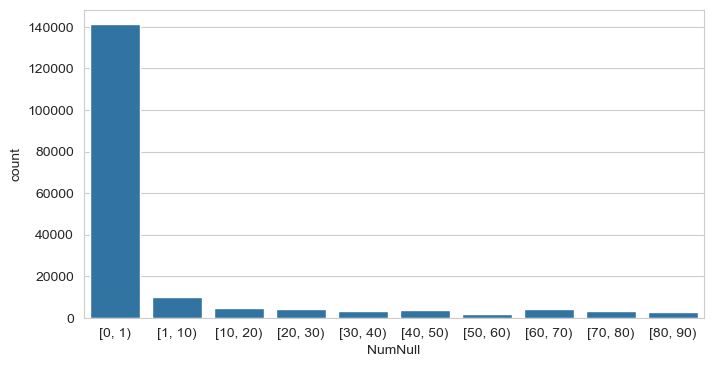

In [69]:
cons = aguah.iloc[0:, 5:]
cons['NumNull'] = cons.isnull().sum(axis=1)
print('Proporción de valores distintos de NaN : {:.2f}%'.format(len(cons[cons.NumNull==0])/len(cons)*100))
bins = [0,1,10,20,30,40,50,60,70,80,90]
cut = pd.cut(cons.NumNull, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)
plt.show()

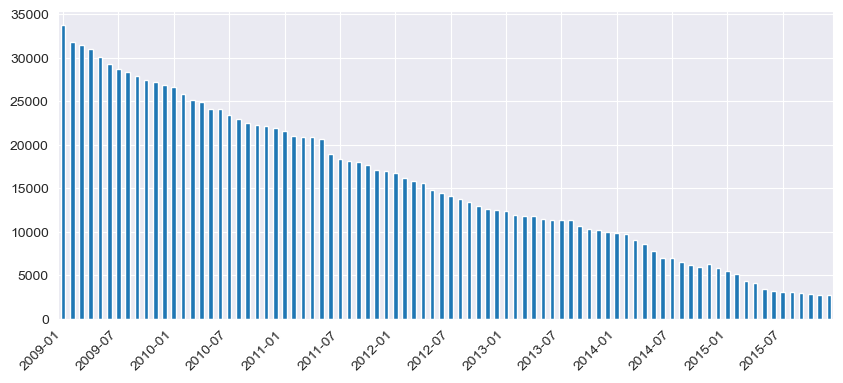

In [70]:
NumNullwithTime = cons.drop('NumNull', axis=1).isnull().sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
pbar = NumNullwithTime.plot.bar()
plt.xticks(list(range(0,len(NumNullwithTime.index),6)), list(NumNullwithTime.index[0::6]), rotation=45, ha='right')
plt.show()

* **Clasificación de los datos**

Debido al comportamiento de los valores NaN, podemos calsificar a los usuarios (filas) en tres tipos: Completos, Interrumpidos y usuarios con un inicio tardio o un fin prematuro en 
el consumo.
Para la clasificación de los usuarios se tomaron encuenta solo los valores NaN dentro de los días de servicio, es decir se toman en cuenta solo los NaN dentro del intervalo
de datos desde el primer dato diferente de NaN hasta el último diferente de NaN.

El objetivo de la clasificación es descartar datos NaN debidos a un comienzo tardio en el consumo o un final prematuro en el consumo, y de esta forma solo imputar los NaN "injustificados"
es decir los datos registrados como NaN dentro de un periodo en el que se deberia estar consumiendo.

In [71]:

groupnull = aguah.iloc[:,0:5]
groupnull = pd.concat([groupnull, cons], axis=1)

groupnull['FirstNonNull'] = cons.copy().drop(['NumNull'], axis=1).isnull().apply(FirstNonNull,axis=1)
groupnull['LastNonNull'] = cons.copy().drop(['NumNull'],axis=1).isnull().apply(LastNonNull,axis=1)
groupnull['NullInService'] = groupnull.NumNull - groupnull.FirstNonNull - (len(cons.columns)-1-groupnull.LastNonNull) +1    
groupnull['NullInService'] = groupnull['NullInService'].apply(Setzero)
groupnull.NullInService.value_counts(sort=False).head(6) ## Print only head values

NullInService
0     173773
1       3894
2        489
3        197
4         80
75         1
Name: count, dtype: int64

In [72]:
contLong = groupnull[groupnull.NumNull==0]
contShort = groupnull[(groupnull.NumNull>0) & (groupnull.NullInService==0)]
interupted = groupnull[(groupnull.NullInService)>0]
print('Length of 3 groups: (Non-NA Group, Edge-NA Group, Interupted Group) = ({}, {}, {})'.format(len(contLong), len(contShort), len(interupted)))

Length of 3 groups: (Non-NA Group, Edge-NA Group, Interupted Group) = (141205, 32568, 4824)


### 5.3. Preparación de los datos


* **Imputación usando KNN** (Aquí lo que se observa en rojo en el informe es lo que se imputa los datos)

In [73]:
## For KNN, choose the size of sample table (same as missing_rate above)
rng = np.random.RandomState(0)
samp_rate = 0.01  ## Here, 1 for use the whole set of entries to search (0.01 only for display)

## Prepare a reference set within Non-NA Group 
num_total = len(contLong)
num_samp = int(np.floor(samp_rate*num_total))
rand_samp = np.hstack((np.zeros(num_total-num_samp, dtype=bool), np.ones(num_samp, dtype=bool)))
rng.shuffle(rand_samp)
sample = contLong.iloc[:,5:89][rand_samp.tolist()]

In [74]:
## KNN imputation (warning it may take a couple of minutes)
itrp = interupted.copy()[(interupted.NullInService>0) & (interupted.NullInService<6)].iloc[:,5:]
result_knn = itrp.apply(lambda x: KnnImputeInPlace(sample, x, 2), axis=1)
result_knn_head = interupted.copy()[(interupted.NullInService>0) & (interupted.NullInService<6)].iloc[:,0:5]
result_knn = pd.concat([result_knn_head, result_knn],axis=1)
result_knn.shape

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1944\4116923635.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(sample.iloc[n_ones[1][0][j]][x_mask_toggled][n])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1944\4116923635.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(sample.iloc[n_ones[1][0][j]][x_mask_toggled][n])
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha

(4705, 93)

In [75]:
## Linear imputation 
itrp = interupted.copy()[(interupted.NullInService>5) & (interupted.NullInService<84)].iloc[:,5:]
itrp.interpolate(method='linear', axis=1, inplace=True)
result_fill_head = interupted.copy()[(interupted.NullInService>5) & (interupted.NullInService<84)].iloc[:,0:5]
result_fill = pd.concat([result_fill_head, itrp],axis=1)
result_fill.shape

(119, 93)

In [76]:
result = pd.concat([contLong, contShort, result_knn, result_fill])
result = result.iloc[:,:89]
result.shape

(178597, 89)

In [77]:
result.to_csv('datos_imputados_KNN')

* **Serie de tiempo con los datos imputados**

Con los datos imputados, graficamos el consumo con respecto al tiempo.

In [78]:
df_datos_imputados = pd.read_csv('datos_imputados_KNN.csv')
df_temp = df_datos_imputados.iloc[0:, 6:]
df_temp

2009-01  2009-02  2009-03  2009-04  2009-05  2009-06  2009-07  \
0          20.0     20.0     20.0     20.0     20.0     20.0     20.0   
1          20.0     20.0     20.0     20.0     20.0     20.0     20.0   
2          20.0     20.0     20.0     20.0     20.0     20.0     20.0   
3          20.0     20.0     20.0     20.0     20.0     20.0     20.0   
4          30.0     10.0     30.0     20.0     30.0     30.0     30.0   
...         ...      ...      ...      ...      ...      ...      ...   
178592      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
178593      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
178594     15.0     15.0     15.0     15.0     15.0     15.0     15.0   
178595      NaN      NaN      NaN      NaN      0.0      0.0      0.0   
178596     30.0     30.0     30.0     30.0     30.0     30.0     30.0   

        2009-08  2009-09  2009-10  ...    2015-03    2015-04    2015-05  \
0          20.0     20.0     20.0  ...   2.000000   1.000000   2.000000   
1          20.0     20.0     20.0  ...  27.000000  27.000000  27.000000   
2          17.0     14.0     10.0  ...  19.000000  19.000000  18.000000   
3          20.0     20.0     20.0  ...  17.000000  17.000000  17.000000   
4          30.0     30.0     30.0  ...  14.000000  15.000000  26.000000   
...         ...      ...      ...  ...        ...        ...        ...   
178592      NaN      NaN      NaN  ...  17.000000  30.000000  28.000000   
178593      NaN      NaN      NaN  ...   0.000000  48.000000   9.000000   
178594     15.0     15.0     15.0  ...  40.789474  41.710526  42.631579   
178595      0.0      0.0      0.0  ...   7.000000  12.000000   9.000000   
178596     30.0     30.0     30.0  ...  34.526316  35.473684  36.421053   

          2015-06    2015-07    2015-08    2015-09    2015-10    2015-11  \
0        1.000000   7.000000   7.000000  42.000000  27.000000  22.000000   
1       28.000000  28.000000  31.000000  27.000000  27.000000  27.000000   
2       18.000000  19.000000  19.000000  19.000000  18.000000  18.000000   
3       17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
4       27.000000  29.000000  22.000000  27.000000  26.000000  33.000000   
...           ...        ...        ...        ...        ...        ...   
178592  26.000000  16.000000  34.000000  23.000000  21.000000  31.000000   
178593  43.000000  42.000000  43.000000  41.000000  36.000000  32.000000   
178594  43.552632  44.473684  45.394737  46.315789  47.236842  48.157895   
178595   9.000000  12.000000  10.000000   9.000000   8.000000  12.000000   
178596  37.368421  38.315789  39.263158  40.210526  41.157895  42.105263   

          2015-12  
0       21.000000  
1       24.000000  
2       24.000000  
3       24.000000  
4       32.000000  
...           ...  
178592  20.000000  
178593  16.000000  
178594  49.078947  
178595   8.000000  
178596  43.052632  

[178597 rows x 84 columns]

In [79]:
df_temp = df_datos_imputados.melt(var_name='Fecha', value_name='Consumo')
df_temp['Fecha'] = pd.to_datetime(df_temp['Fecha'], format='%Y-%m', errors='coerce')
df_long = df_temp.groupby('Fecha')['Consumo'].sum().reset_index()
df_consumo_total = df_long.copy()
df_consumo_total['Fecha'] = pd.to_datetime(df_consumo_total['Fecha'])
df_consumo_total

Fecha          Consumo
0  2009-01-01        9372506.5
1  2009-02-01   7029116.263158
2  2009-03-01   5568504.276316
3  2009-04-01   6150863.857656
4  2009-05-01   6865531.522545
..        ...              ...
79 2015-08-01  17799041.328627
80 2015-09-01  19535532.662902
81 2015-10-01  10923627.997176
82 2015-11-01  15185690.331451
83 2015-12-01  14030023.665725

[84 rows x 2 columns]

* **Normalización de los datos**

Ya con los datos imputados, se procedió a normalizarlos.

<Incluir una explicación de para que sirve normalizar :3>

In [80]:
scaler = MinMaxScaler()
df_normalizado = df_consumo_total.copy()
df_normalizado['Consumo_normalizado'] = scaler.fit_transform(df_consumo_total[['Consumo']])
df_normalizado

Fecha          Consumo  Consumo_normalizado
0  2009-01-01        9372506.5             0.398235
1  2009-02-01   7029116.263158             0.263232
2  2009-03-01   5568504.276316             0.179086
3  2009-04-01   6150863.857656             0.212636
4  2009-05-01   6865531.522545             0.253808
..        ...              ...                  ...
79 2015-08-01  17799041.328627             0.883689
80 2015-09-01  19535532.662902             0.983729
81 2015-10-01  10923627.997176             0.487596
82 2015-11-01  15185690.331451             0.733134
83 2015-12-01  14030023.665725             0.666556

[84 rows x 3 columns]

In [81]:
df_normalizado.drop('Consumo', axis=1, inplace=True)
df_normalizado.rename(columns={'Consumo_normalizado':'Consumo'}, inplace=True)
df_normalizado.set_index('Fecha', inplace=True)
df_normalizado

Consumo
Fecha               
2009-01-01  0.398235
2009-02-01  0.263232
2009-03-01  0.179086
2009-04-01  0.212636
2009-05-01  0.253808
...              ...
2015-08-01  0.883689
2015-09-01  0.983729
2015-10-01  0.487596
2015-11-01  0.733134
2015-12-01  0.666556

[84 rows x 1 columns]

<Axes: title={'center': 'Serie de Consumo Normalizado por Fecha'}, xlabel='Fecha'>

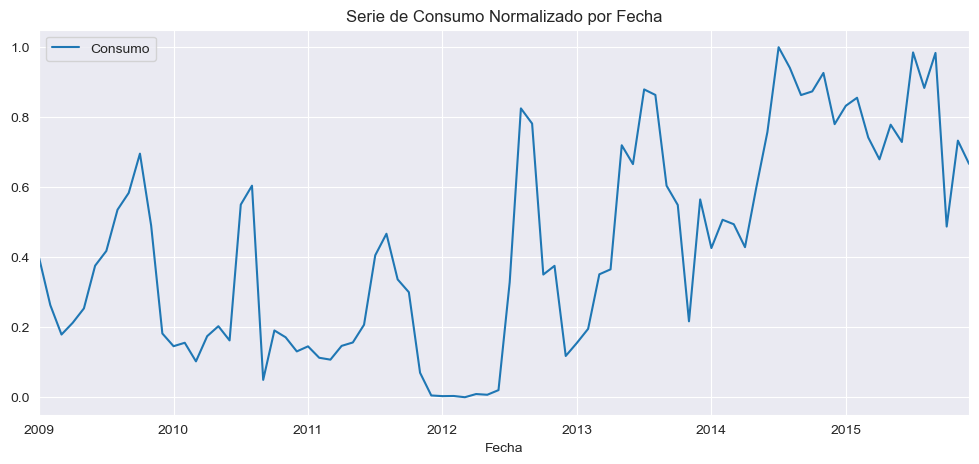

In [82]:
df_normalizado.plot(title="Serie de Consumo Normalizado por Fecha", figsize=(12,5))

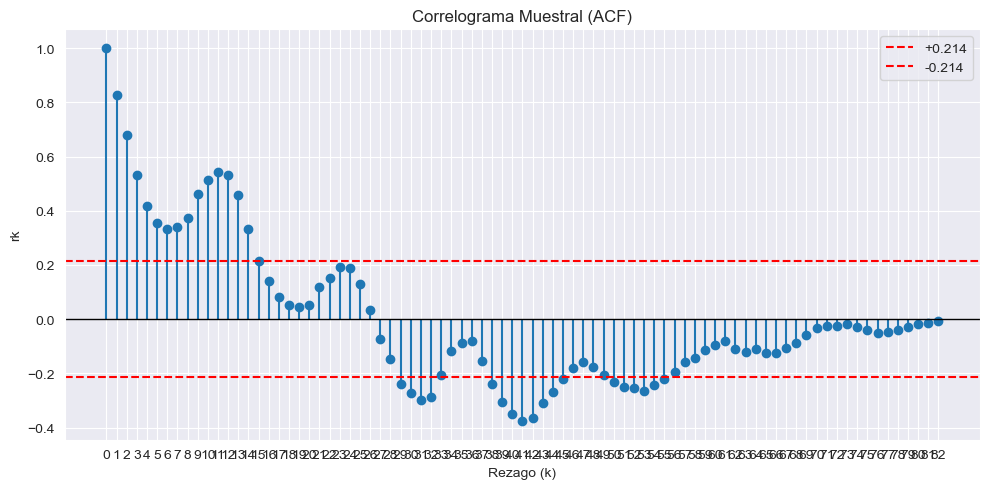

In [83]:
rk = coeficientes_rk(df_normalizado, 83)

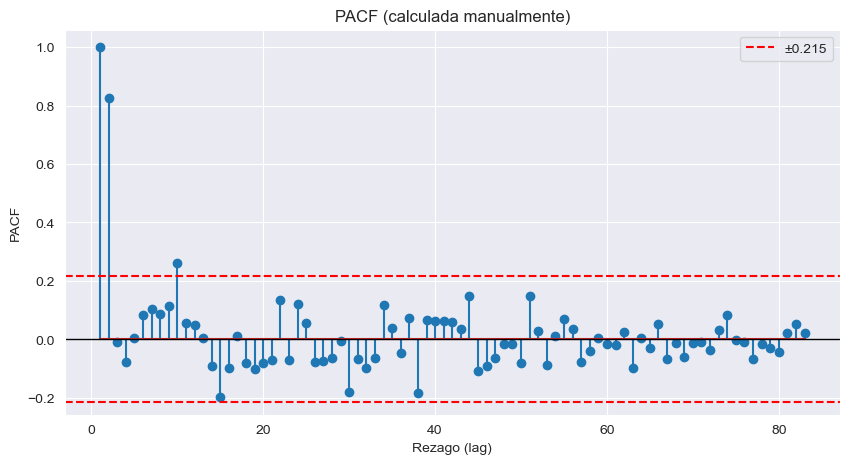

In [84]:
pacf, phi = levinson_durbin(rk)

mean       std
Año                     
2009  0.382410  0.169673
2010  0.220049  0.172226
2011  0.204971  0.141680
2012  0.235213  0.303713
2013  0.510989  0.252315
2014  0.716391  0.213533
2015  0.779820  0.140623

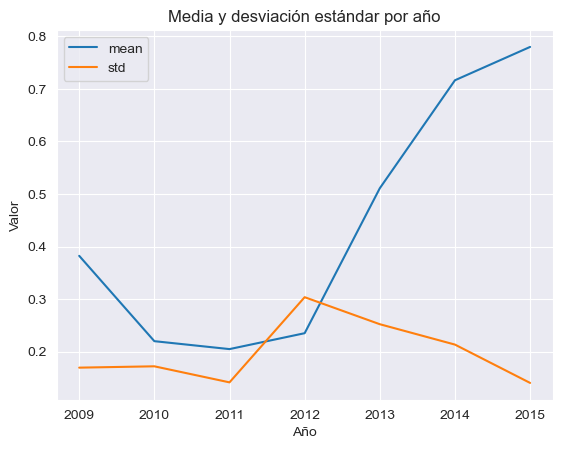

In [85]:
calcular_estadisticas(df_normalizado)

In [86]:
df_normalizado.to_csv("consumo_total.csv", index = True)

---

### 5.4. Modelamiento con método Box-Jenkins

* **Diferenciación**

Este es un paso fundamental en la metodología Box-Jenkins ya que su función es la transformación de una serie de tiempo no estacionaria como es en nuestro caso con el consumo de agua, en una **serie estacionaria**. Una serie es estacionaria si su media y varianza se mantienen constantes a lo largo del tiempo, lo cual es un requisito para poder aplicar modelos ARIMA (La cual no utilizamos pero creamos nuestros métodos ARIMA).
Y con esta técnica conseguimos calcular la diferencia que hay entre una observación y la anterior $Y'_t = Y_t - Y_{t-1}$ para poder eliminar tendencias lineales presentes en los datos ya que si la serie aún no es estacionaria, se puede hacer más diferenciaciones.

Esto es muy importante ya que en nuestro caso el coeficiente  $\phi_0$ representa el intercepto del modelo y al omitirlo en este modelo que ya fue diferenciado , asumimos que ya no existe una tendencia direccional sistematica a lo largo de la serie.

Ya normalizados los datos, para simplificar los cálculo podemos no incluir el coeficiente $\phi_0$

mean       std
Año                     
2010 -0.162361  0.209329
2011 -0.015078  0.122231
2012  0.030243  0.223588
2013  0.275776  0.289788
2014  0.205402  0.203335
2015  0.063428  0.236251

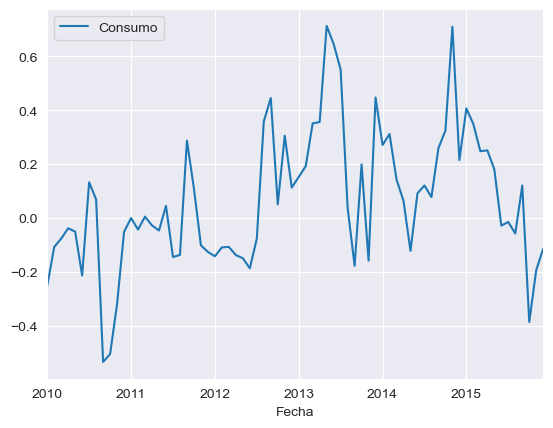

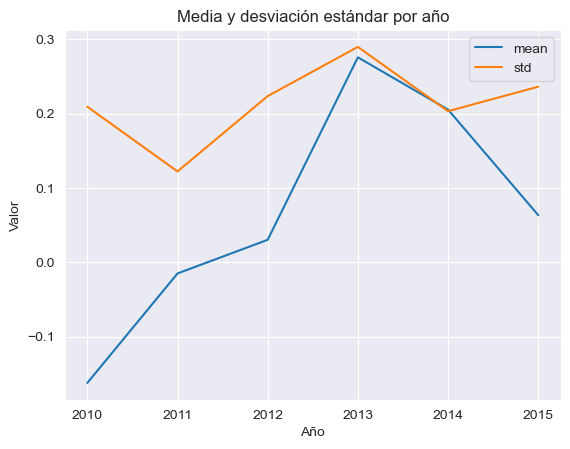

In [87]:
df_dif_1 = diferenciar(df_normalizado)
graficar(df_dif_1)
calcular_estadisticas(df_dif_1)

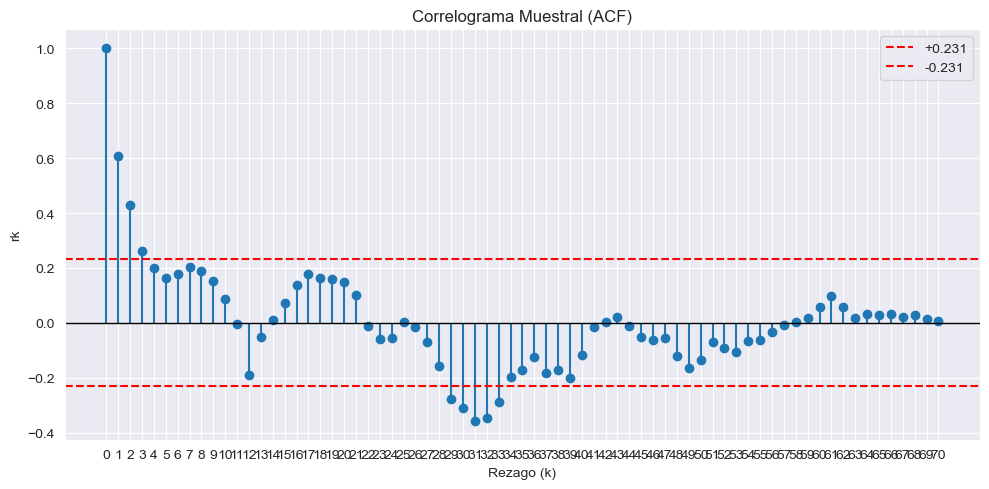

In [88]:
rk = coeficientes_rk(df_dif_1, 71)

Se decidió probar con 4 rezagos ya que en la ACF son los 4 primeros rezagos los que sobrepazan el intervalo de confianza.
Es decir, son estadísticamente confiablez al 95%.

Los resultados de esta gráfica nos dan un muy buen idício de usar un coeficiente $p = 4$ es decir un modelo $AR(4)$.

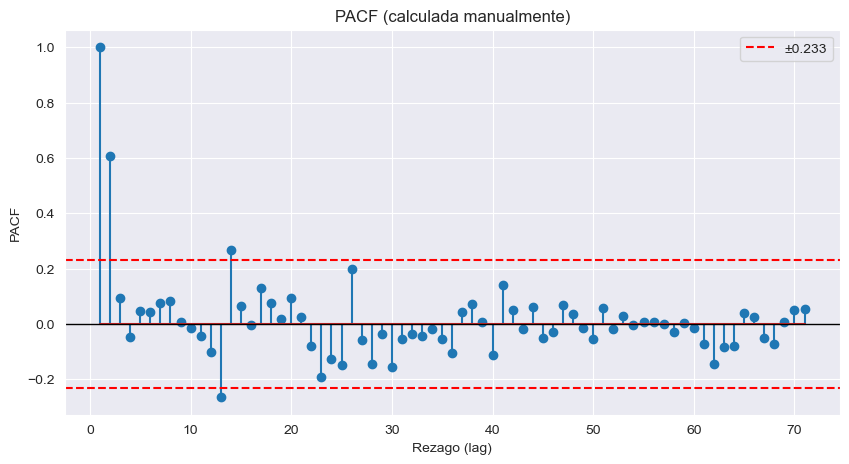

In [89]:
pacf, phi = levinson_durbin(rk)

El resultado de la PACF, nos indica que un modelo autoregresivo de orden 2 (ya que son los primeros dos resultados de la pacf los que salen del intervalo de confianza) es suficiente para modelar nuestra linea de tiempo. Es decri, que para el modelado se utilizará un modelo AR(2).

---

## Función de autocorrelación estimada


Dado que analiza series temporales, esta herramienta es muy importante para nuestro proyecto. Su objetivo principal es determinar la relación lineal entre la serie actual $z_t$ y sus valores pasados $z_{t-k}$. 
En otras palabras, nos muestra la fuerza de la conexión de la serie consigo misma a lo largo de varios intervalos o retrasos temporales. 
Hay varias razones por las que el estudio de las series temporales es fundamental:

1. **Identificación**: un correlograma de una serie no estacionaria que revela una tendencia o estacionalidad tendrá autocorrelaciones altas que disminuirán gradualmente. Por otro lado, una serie estacionaria mostraría coeficientes de autocorrelación que caen rápidamente a cero.
2. **Detección**: Si la serie muestra un patrón estacional, es decir, ciclos anuales, la ACF mostrará picos prominentes en los desfases relacionados con la frecuencia del ciclo, por ejemplo, en el desfase 12 para datos mensuales.
3. **Elección del modelo de previsión**: La forma en que disminuye la ACF ofrece pistas fundamentales para determinar los parámetros de los modelos empleados para las predicciones. 
4. El cálculo de la ACF de los residuos de un modelo de previsión mostrará si el modelo ha cubierto todos los datos de la serie. Un correlograma de los residuos que no muestra autocorrelación sustancial implica que los errores son ruido blanco, lo que indica un ajuste adecuado. 


$$
r_k
=
\frac{\sum^T_{t =k+1} (z_t - \bar{z}) (z_{t-k} - \bar{z})}{\sum^T_{t = 1} (z_t - \bar{z})^2}
$$

- **Numerador**:$\sum^T_{t =k+1} (z_t - \bar{z}) (z_{t-k} - \bar{z})$ *Función*: Evalúa la covarianza de la serie con una versión retardada de sí misma $k$ períodos anteriormente. Se calcula sumando el producto de las desviaciones de cada valor con respecto a la media de la serie junto con el producto de las desviaciones de los valores que preceden a $k$ períodos.

- **Denominador**: Suma de los cuadrados de las desviaciones de cada valor de la serie con respecto a su media. La normalización del numerador utilizando esta varianza garantiza que el valor de $r_k$ esté siempre dentro del rango *[-1, 1]*.

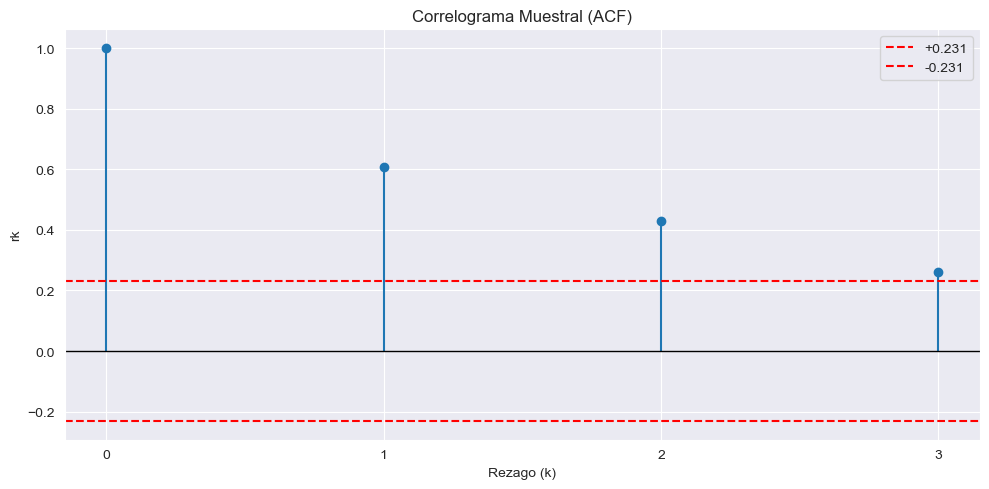

[1.         0.60669578 0.42772633 0.26258746]


In [90]:
rk = coeficientes_rk(df_dif_1,4)
print(rk)


$$
r_k 
=
\left(
\begin{array}{c}
1.0 \\
0.60669578 \\
0.42772633 \\
0.26258746 \\
\end{array}
\right)
$$

---

### Función de autocorrelación parcial (PACF)

* **Algoritmo de Leivinson-Durbin**

El algoritmo de Leivinson-Durbin es un procedimiento que nos permite estimar los coeficientes para un modlo autoregresivo $AR(k)$.
También estima el coeficiente $\phi_{kk}$, que este mismo es la PACF en el rezago $k$.

$$
\phi_{kk}
=
\left(
\begin{array}{ccc}
\phi_{11} & 0 & 0\\
\phi_{21} &  \phi_{22}& 0\\
\phi_{31} &  \phi_{32}& \phi_{33}\\
\end{array}
\right)
$$

Como antes calculamos los coeficientes de autocorrelación $r_k$ podemos asumir por propiedad que el primer valor de $\phi_{kk}$ es igual a el primer valor de $r_k$.

Es decir:

$$
\phi_{11}
=
r_1
=
0.60669578
$$

Para los siguientes valores de $\phi_{kk}$ se aplicó el algoritmo de Leivinson-Durbin.
Dado una serie de autocorrelaciones, es decir $r_k$, desde $k=2$ aplicamos el paso recursivo.

Paso recursivo para $k \geq 2$:

$$
\phi_{kk}
=
\frac{r_k - \sum_{j=1}^{k-1} \phi_{k-1,j}r_{k-j}}{\sigma^2_{k-1}}
$$

Actualización de los coeficientes, para $j = 1, \dots, k-1$:

$$
\phi_{k,j} = \phi_{k,j} - \phi_{kk}\phi_{k-1,k-j}
$$

Actualizacón de varianza:

$$
\sigma^2_k = \sigma^2_{k-1} (1 - \phi^2_{kk})
$$

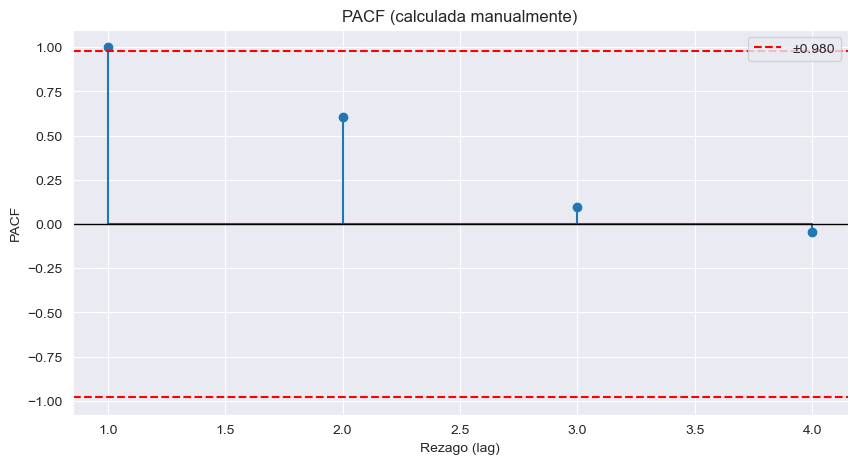

In [91]:
pacf, phi = levinson_durbin(rk)


In [92]:
print(phi)

[[ 0.60669578  0.          0.        ]
 [ 0.54943014  0.09438939  0.        ]
 [ 0.55390386  0.12043042 -0.04739643]]


$$
\phi_{kk}
=
\left(
\begin{array}{ccc}
\textbf{ 0.60669578} & 0 & 0\\
0.54943014 &  \textbf{0.09438939}& 0\\
0.55390386 &  0.12043042& \textbf{-0.04739643}\
\end{array}
\right)
$$

In [93]:
pacf

array([ 1.        ,  0.60669578,  0.09438939, -0.04739643])

* **Aproximación por Mínimos Cuadrados Ordinarios (OLS)**

Una variante más directa para estimar los valores de $\phi_{kk}$, es hacerlo mediante mínimos cuadrados ordinarios en su forma matricial. Se aplica asumiendo que la relación entre la variable dependiente y la variable predictora es lineal. En este caso la variable dependiente es decir la predicción $\hat{z}_t$ va a tener una relación lineal con la variable predictora $z_{t-p}$.

* **Definiendo las matrices necesarias para aplicar *OLS* orientado a un modelo *AR(1)*:**

Partiendo desde el modelo al que se desea aproximar una solución, ya que implementaremos *AR(1)* el modelo es:

$$
\hat{z}_t = Z_{t-1} \phi_1\\

$$
$$

\hat{z} = 
\begin{bmatrix}
\hat{z}_1\\
\hat{z}_{2}\\
\vdots\\
\hat{z}_{n-1}
\end{bmatrix}, \quad


Z =
\begin{bmatrix}
z_{0} \\
z_1 \\
\vdots \\
z_{n-2}
\end{bmatrix}
, \quad

\phi =
\begin{bmatrix}
\phi_1 \\
\end{bmatrix}
, \quad
n: \text{número de elementos}
$$


que se pueden escribir como:

$$
\hat{z} = z\phi
$$




El sistema de ecuaciones resultante, generalmente no es un sistema cuadrado y por ello no se tiene una solución unica. Este sistema se conoce como *Ecuación de los Mínimos Cuadrados*
$$
(Z^T Z) \phi = Z^T \hat{z} 
$$

Desarrollando $z^T z$ generalmente:

$$
Z^T Z
=

\begin{bmatrix}
z_0 & \dots & z_{n-2}
\end{bmatrix}
\begin{bmatrix}
z_0 \\ 
\vdots \\ 
z_{n-2}
\end{bmatrix}
=
\begin{bmatrix}
\sum^{n-1}_{i = 1} z_{i-1}^2
\end{bmatrix}
$$

Desarrollando $Z^T \hat{z}$:


$$
Z^T \hat{z}
=

\begin{bmatrix}
z_0 & \dots & z_{n-2}
\end{bmatrix}
\begin{bmatrix}
\hat{z}_{1} \\ 
\vdots \\ 
\hat{z}_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
\sum^{n-1}_{i = 1} z_{i-1} \hat{z}_i
\end{bmatrix}
$$


Por lo tanto:

$$
\begin{bmatrix}
\sum^{n-1}_{i = 1} z_{i-1}^2
\end{bmatrix}

\begin{bmatrix}
\phi_1 
\end{bmatrix}
=
\begin{bmatrix}
\sum^{n-1}_{i = 1} z_{i-1} \hat{z}_i
\end{bmatrix}
$$

$$
\phi_1 = \frac{\sum^{n-1}_{i = 1} z_{i-1} \hat{z}_i}{\sum^{n-1}_{i = 1} z_{i-1}^2}
$$

In [94]:
phi, prediccion, residuos = minimos_cuadrados_ols(df_dif_1, 1)

In [95]:
print(phi)

[[0.63776353]]


---

### 5.5. Modelado

Para el modelado usamos los coeficientes $\phi_{pk}$ correspondientes al orden del modelo $AR(p)$ que vayamos a implementar. Es decir, si deseamos implementar un modelo $AR(1)$ tomamos los valores de $\phi_{1k}$. 

* **AR(1)**

$$
\phi_{1} = 0.60669578
$$

$$
\hat{z}_t = 0.60669578 z_{t-1}
$$

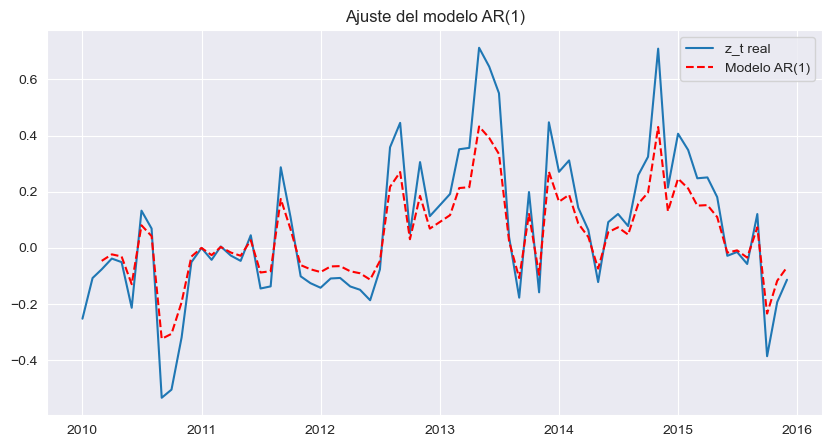

In [96]:
phi_1 = 0.60669578

z_modelo = modelo_ar1(df_dif_1['Consumo'], phi_1)
z_original = df_dif_1['Consumo']

plt.figure(figsize=(10, 5))
plt.plot(z_original, label='z_t real')
plt.plot(z_modelo,color='red', label='Modelo AR(1)', linestyle='--')
plt.title("Ajuste del modelo AR(1)")
plt.legend()
plt.grid(True)
plt.show()

* **AR(2)**

$$
\phi_1 =  0.54943014,\quad \phi_2 = 0.09438939
$$

$$
\hat{z}_t = 0.54943014 z_{t-1} + 0.09438939 z_{t-2}
$$

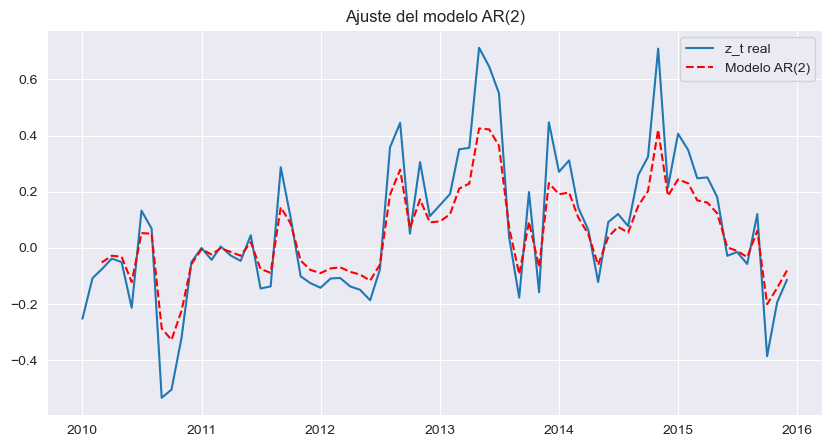

In [97]:
phi_1 = 0.54943014
phi_2 = 0.09438939

z_modelo = modelo_ar2(df_dif_1['Consumo'], phi_1, phi_2 )

plt.figure(figsize=(10, 5))
plt.plot(df_dif_1['Consumo'], label='z_t real')
plt.plot(z_modelo,color='red', label='Modelo AR(2)', linestyle='--')
plt.title("Ajuste del modelo AR(2)")
plt.legend()
plt.grid(True)
plt.show()


* **AR(3)**

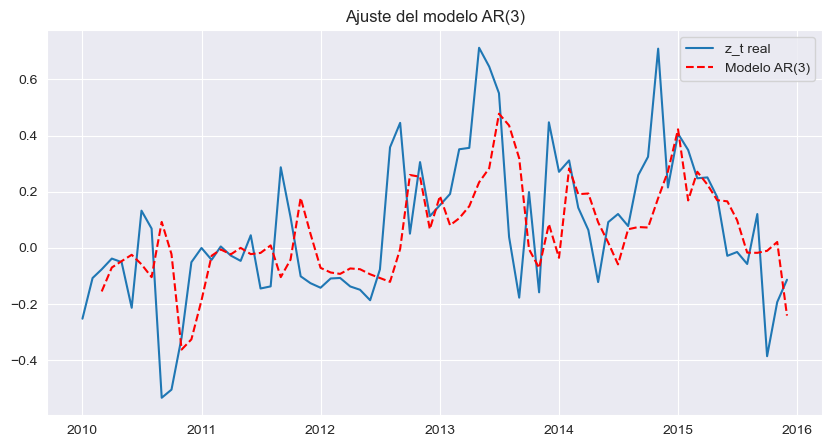

In [98]:
phi_1 = -0.01606165
phi_2 = 0.13023868
phi_3 = 0.56492917

z_modelo = modelo_ar3(df_dif_1['Consumo'], phi_1, phi_2, phi_3)

plt.figure(figsize=(10, 5))
plt.plot(df_dif_1['Consumo'], label='z_t real')
plt.plot(z_modelo,color='red', label='Modelo AR(3)', linestyle='--')
plt.title("Ajuste del modelo AR(3)")
plt.legend()
plt.grid(True)
plt.show()

Se decidió usar el modelo $AR(1)$ ya que es el que mejor se ajusta a la gráfica original.

---

### 5.6. Pronóstico

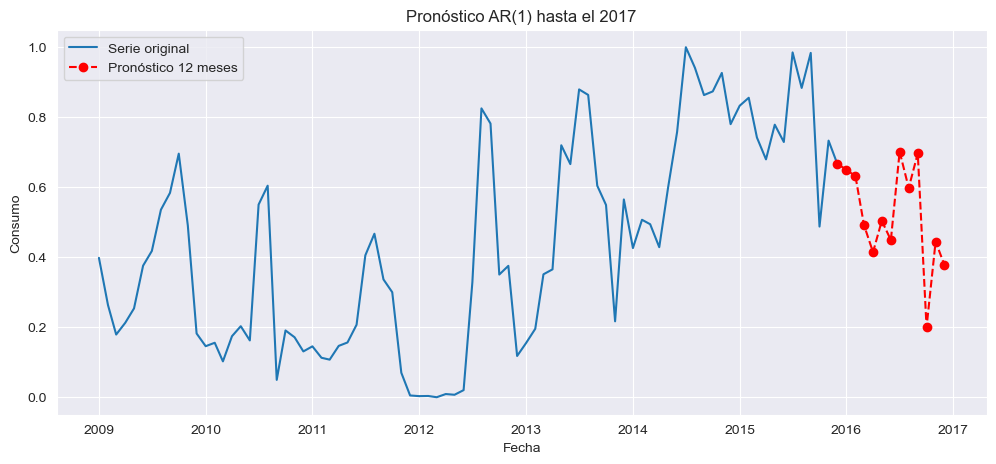

In [99]:
phi_1 = 0.60669578
df_extendido, y_preds = pronosticar_ar1(df_dif_1, df_normalizado, phi_1, pasos=12)

plt.figure(figsize=(12, 5))
plt.plot(df_normalizado['Consumo'], label='Serie original')
plt.plot(df_extendido.index[-13:], df_extendido['Consumo'].iloc[-13:], 'ro--', label='Pronóstico 12 meses')
plt.title("Pronóstico AR(1) hasta el 2017")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.grid(True)
plt.legend()
plt.show()



---

### 5.7. Simulación

Residuos para la simulación:

$$
u_t
=
z_t
-
\hat{z}_t
$$

In [100]:
z_modelo = modelo_ar1(df_dif_1['Consumo'], phi_1)
z_original = df_dif_1['Consumo']

residuos = z_original - z_modelo

Desviación estandar de los residuos del modelo $AR(1)$
$$
\sigma = \sqrt {\frac{1}{n} \sum^n_{i=0} u_t^2}
$$

In [101]:
sigma = np.std(residuos)
print(sigma)

0.10010624255166325


$$
\sigma
=
0.10010624255166325
$$

Escenarios de escasez.

* **sequia**
Se usó el parámetro impacto para calcular la gravedad con la que afectará la sequía. En este caso se usó un impacto de $-0.2$ ya que es un impacto común y no tan extremo como por ejemplo $-0.5$

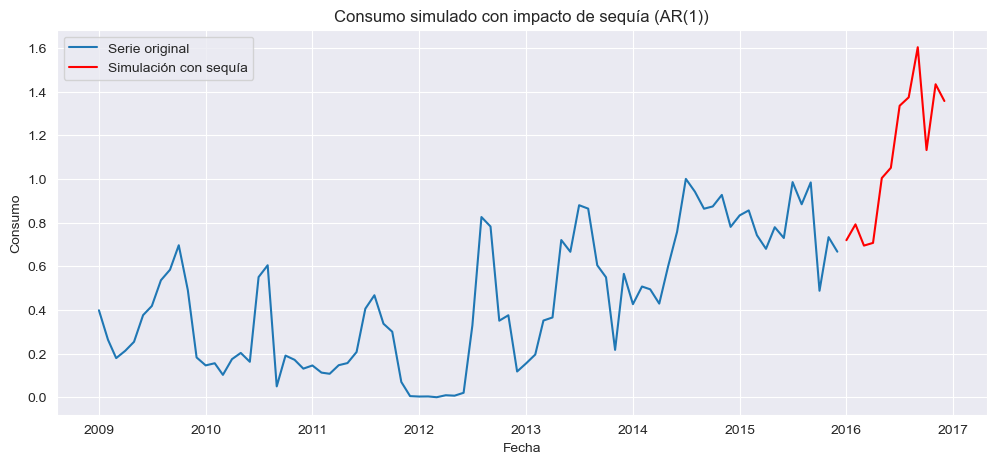

In [102]:
y_ultimos_13 = df_normalizado['Consumo'].iloc[-13:].tolist()

phi_1 = 0.60669578
sigma = 0.10010624

# Simular 12 meses con sequía desde el mes 6
z_sim, y_sim = simular_ar1(phi_1, sigma, pasos=12,
                                              impacto=-0.2, desde_mes=6,
                                              y_inicial=y_ultimos_13)

# Crear serie simulada con fechas

fechas_sim = pd.date_range(start=df_normalizado.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
df_simulado = pd.Series(y_sim, index=fechas_sim, name='Consumo Simulado')

# Graficar junto al original
plt.figure(figsize=(12, 5))
plt.plot(df_normalizado['Consumo'], label="Serie original")
plt.plot(df_simulado, color='red',label="Simulación con sequía")
plt.title("Consumo simulado con impacto de sequía (AR(1))")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.grid(True)
plt.legend()
plt.show()



### 5.7. Flujograma

### 5.7. Link de repositorio.

https://github.com/AlejandroChicaizaBMV/Proyecto_MN#

### 5.8. Estadísticas de contribuciones del repositorio.

### 5.9. Tiempo de ejecución

### 5.10. Referencias